## Data science and Buisiness Analytics Internship at The Sparks Foundation
## **Task 2: Prediction using Unsupervised Machine Learning**
### In this task we have to predict the optimum number of clusters and to represent visually 
*Author - Khan Shoeb* 


In [1]:
# importing required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# importing Data from url

data_url = "https://bit.ly/3VWMJZw"
data_ = pd.read_csv(data_url)
data=data_
print("Data imported successfully")

Data imported successfully


In [3]:
# To know about the data print top five rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape of the data i.e no.of rows and coloumn 
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Cheking for any Null value
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data preparation

In [8]:
# Now seperating input data (Atributes).  
X=data.iloc[:, 1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
wcss = []
k_rng = range(1, 10)
for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

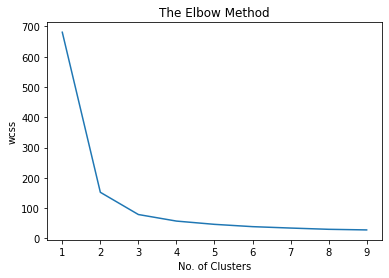

In [10]:
# To find Elbow point we plot the line graph

plt.plot(k_rng, wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### From the graph we can see that elbow occurs at 2 and 3.

In [11]:
# Now we take k=3 and create K-Means classifier

K = KMeans(n_clusters=3)
K.fit(X)

KMeans(n_clusters=3)

In [12]:

K.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [13]:
# creating new column for Cluster Labels
data['Cluster Labels']=K.labels_

In [14]:

df1=data[data['Cluster Labels'] ==0]
df2=data[data['Cluster Labels'] ==1 ]
df3=data[data['Cluster Labels'] ==2 ]

# Center point for clusters
Centr=K.cluster_centers_
Centr

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

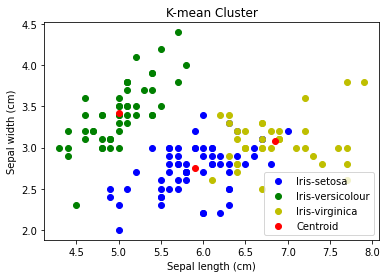

In [15]:
# Ploting the scatter plot for every cluster
plt.scatter(df1.iloc[:, 1], df1.iloc[:, 2], color='b', label='Iris-setosa', alpha=1)
plt.scatter(df2.iloc[:, 1], df2.iloc[:, 2], color='g', label='Iris-versicolour')
plt.scatter(df3.iloc[:, 1], df3.iloc[:, 2], color='y', label='Iris-virginica')
plt.scatter(Centr[:, 0], Centr[:, 1], color='r', label='Centroid')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('K-mean Cluster')
plt.legend()
plt.show()

#### Thankyou 